The goal of this section is to develop a simple linear regression model for understanding how the price of a TV varies according to 
- brand
- inch
- technology used (4K, OLED, LED, ULED, QLED, UHD)

We will not use **old_price** to predict **current_price**, or vice versa, because this is not helpful for understanding how a TV is priced.

### Import packages

In [3]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from statsmodels.compat import lzip

import scipy.stats as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as sgg
import statsmodels.formula.api as smf
import statsmodels.stats.api as smsa
import statsmodels.graphics.tsaplots as sgt

### Load csv file

In [4]:
data = {}
data['raw'] = pd.read_csv('../data/data.csv', encoding = "ISO-8859-1")
data['raw']

,LED,OLED,QLED,UHD,ULED,X4K,brand,current_price,description,id,inch,name,old_price
0,1,0,0,0,0,0,HAI,749.0,Energy saving and Eco-friendly with auto contr...,HAI-LE32K6000T,32.0,Haier 32-Inch Full HD LED TV Model LE32K6000T,889.0
1,1,0,0,1,0,1,HAI,1885.0,Smart Share function which connects with smart...,HAI-LE50U6600U,50.0,Haier 50-inch 4K Ultra HD Smart LED TV LE50U6600U,2829.0
2,1,0,0,0,0,0,HSE,1599.0,Hisense new VIDAA U Smart Tv Operating SystemO...,HSE-49A5700PW,49.0,Hisense 49-Inch HD LED Smart TV Model 49A5700PW,1899.0
3,1,0,0,0,0,0,HSE,1499.0,49 inch narrow frame Display3 HDMI and 1 USB P...,HSE-49N2173P,49.0,Hisense 49-inch LED TV HSE-49N2173P,1829.0
4,0,0,0,1,0,1,HSE,2399.0,Hisense new VIDAA Smart Tv Operating SystemSma...,HSE-55A6100UW,55.0,Hisense 55-inch 4K Ultra HD Smart TV Model 55A...,2699.0
5,0,0,0,1,0,0,HSE,2599.0,65-Inch Ultra HD 3840×2160 HDR Technology Remo...,HSE-55A6501UW,55.0,Hisense 55-Inch UHD TV A6501,2999.0
6,0,0,0,1,0,0,HSE,3899.0,65-Inch Ultra HD 3840×2160 HDR Technology Remo...,HSE-65A6501UW,65.0,Hisense 65-Inch UHD TV A6501,4999.0
7,0,0,0,1,0,0,LG,1799.0,High-Resolution for a razor sharp imageConsist...,LG-43UK6300,43.0,LG 43UK6300PTE 43-inch UK63 Series UHD HDR Sma...,2357.0
8,0,0,0,1,0,0,LG,1999.0,49-inchMulti-channelHigh-Resolution4K Active HDR,LG-49UK6320,49.0,LG 49-inch UHD TV LG-49UK6320,3017.0
9,0,0,0,1,0,0,LG,3499.0,"Rich, accurate color and deeper blackSpectacul...",LG-49SK8000,49.0,LG 49SK8000PTA 49-inch SK80 Series Super UHD H...,4299.0


### Handle cells with null values

We need to make sure that there are no NULL values before fitting a linear model, especially in the columns that we are interested in using to predict **current_price**.

In [5]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(data['raw'])

,LED,OLED,QLED,UHD,ULED,X4K,brand,current_price,description,id,inch,name,old_price
23,0,0,0,0,0,0,MSI,1080.0,"Curved Gaming, 1800R144 Hz Refresh Rate1ms Fas...",MSI-MAG24C,23.0,MSI 23.6-Inch Curved Gaming Monitor Optix MAG24C,NaN
24,0,0,0,0,0,0,MSI,1400.0,"Curved Gaming, 1800R144 Hz Refresh Rate1ms Fas...",MSI-MAG27C,27.0,MSI 27-Inch Curved Gaming Monitor Optix MAG27C,NaN
25,1,0,0,0,0,0,PSN,989.0,NaN,PSN-TH32F400K,32.0,Panasonic 32-Inch Viera LED TV TH-32F400K,1069.0
29,1,0,0,0,0,0,PSN,1915.0,NaN,PSN-TH49E410K,49.0,Panasonic 49-inch Full HD LED TV PSN-TH49E410K,2649.0
36,1,0,0,0,0,0,PEN,442.0,"Screen size: 24"" (16:9 format)Max. resolution:...",PEN-PLED2410,24.0,Pensonic 24-inch LED TV PEN-PLED2410,NaN
39,1,0,0,0,0,0,PLP,1149.0,"With Digital Crystal Clear108 cm (43"")Full HD ...",PLP-43PFT4002,NaN,Philips 43PFT4002S/98 Full HD Ultra Slim LED T...,1499.0
78,0,0,0,0,0,0,SNY,1549.0,NaN,SNY-KDL40W650D,40.0,"Sony 40"" Full HD Internet TV SNY-KDL40W650D",1885.0
82,0,0,0,1,0,1,SNY,2399.0,NaN,SNY-KD49X7500F,49.0,Sony 49-inch 4K HDR UHD TV KD-49X7500F,2859.0
93,1,0,0,1,0,1,SNY,4319.0,NaN,SNY-KD65X7500F,75.0,Sony X75F 65-inch 4K Ultra HD HDR LED Smart TV...,5059.0
94,1,0,0,1,0,1,SNY,6999.0,4K High Dynamic Range4K HDR Processor X14K X-...,SNY-KD65X8500F,NaN,Sony X85F | LED | 4K ULTRA HD Smart Android TV...,7499.0


In the **inch** column, there are two NaN values spotted, one of them (row 39) can be fixed manually by simply looking at its **description** (the correct **inch** value is 43).

In [6]:
data['cleaned'] = data['raw'].copy()
data['cleaned'].at[39, 'inch'] = 43
nans(data['cleaned'])

,LED,OLED,QLED,UHD,ULED,X4K,brand,current_price,description,id,inch,name,old_price
23,0,0,0,0,0,0,MSI,1080.0,"Curved Gaming, 1800R144 Hz Refresh Rate1ms Fas...",MSI-MAG24C,23.0,MSI 23.6-Inch Curved Gaming Monitor Optix MAG24C,NaN
24,0,0,0,0,0,0,MSI,1400.0,"Curved Gaming, 1800R144 Hz Refresh Rate1ms Fas...",MSI-MAG27C,27.0,MSI 27-Inch Curved Gaming Monitor Optix MAG27C,NaN
25,1,0,0,0,0,0,PSN,989.0,NaN,PSN-TH32F400K,32.0,Panasonic 32-Inch Viera LED TV TH-32F400K,1069.0
29,1,0,0,0,0,0,PSN,1915.0,NaN,PSN-TH49E410K,49.0,Panasonic 49-inch Full HD LED TV PSN-TH49E410K,2649.0
36,1,0,0,0,0,0,PEN,442.0,"Screen size: 24"" (16:9 format)Max. resolution:...",PEN-PLED2410,24.0,Pensonic 24-inch LED TV PEN-PLED2410,NaN
78,0,0,0,0,0,0,SNY,1549.0,NaN,SNY-KDL40W650D,40.0,"Sony 40"" Full HD Internet TV SNY-KDL40W650D",1885.0
82,0,0,0,1,0,1,SNY,2399.0,NaN,SNY-KD49X7500F,49.0,Sony 49-inch 4K HDR UHD TV KD-49X7500F,2859.0
93,1,0,0,1,0,1,SNY,4319.0,NaN,SNY-KD65X7500F,75.0,Sony X75F 65-inch 4K Ultra HD HDR LED Smart TV...,5059.0
94,1,0,0,1,0,1,SNY,6999.0,4K High Dynamic Range4K HDR Processor X14K X-...,SNY-KD65X8500F,NaN,Sony X85F | LED | 4K ULTRA HD Smart Android TV...,7499.0


We don't know how to fix row 94 (the description isn't helpful), so we will remove this data point from for the rest of this analysis. This is probably not the best thing to do, but the effects should be negligible because from the "Initial Data Analysis" section, we noticed that **SONY** has a large number of products (datapoints).

In [7]:
data['cleaned'] = data['cleaned'].drop([94])
nans(data['cleaned'])

,LED,OLED,QLED,UHD,ULED,X4K,brand,current_price,description,id,inch,name,old_price
23,0,0,0,0,0,0,MSI,1080.0,"Curved Gaming, 1800R144 Hz Refresh Rate1ms Fas...",MSI-MAG24C,23.0,MSI 23.6-Inch Curved Gaming Monitor Optix MAG24C,NaN
24,0,0,0,0,0,0,MSI,1400.0,"Curved Gaming, 1800R144 Hz Refresh Rate1ms Fas...",MSI-MAG27C,27.0,MSI 27-Inch Curved Gaming Monitor Optix MAG27C,NaN
25,1,0,0,0,0,0,PSN,989.0,NaN,PSN-TH32F400K,32.0,Panasonic 32-Inch Viera LED TV TH-32F400K,1069.0
29,1,0,0,0,0,0,PSN,1915.0,NaN,PSN-TH49E410K,49.0,Panasonic 49-inch Full HD LED TV PSN-TH49E410K,2649.0
36,1,0,0,0,0,0,PEN,442.0,"Screen size: 24"" (16:9 format)Max. resolution:...",PEN-PLED2410,24.0,Pensonic 24-inch LED TV PEN-PLED2410,NaN
78,0,0,0,0,0,0,SNY,1549.0,NaN,SNY-KDL40W650D,40.0,"Sony 40"" Full HD Internet TV SNY-KDL40W650D",1885.0
82,0,0,0,1,0,1,SNY,2399.0,NaN,SNY-KD49X7500F,49.0,Sony 49-inch 4K HDR UHD TV KD-49X7500F,2859.0
93,1,0,0,1,0,1,SNY,4319.0,NaN,SNY-KD65X7500F,75.0,Sony X75F 65-inch 4K Ultra HD HDR LED Smart TV...,5059.0


### Map the 'brand' column to numeric values

We need to convert the "brand" column to numeric values.

In [8]:
data['regression'] = data['cleaned'].copy()
data['regression']['brand_numeric'] = pd.factorize(data['regression']['brand'])[0]

### Linear Regression (full model)

We will fit a linear model to predict **current_price** using all available features and observe its performance.

In [9]:
model = {}

In [10]:
model['full'] = smf.ols('current_price ~ inch + C(brand) + C(ULED) + C(LED) + C(OLED) + C(QLED) + C(UHD) + C(X4K)', 
                        data = data['regression']).fit()
model['full'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     15.97
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           9.31e-19
Time:                        21:11:37   Log-Likelihood:                -906.33
No. Observations:                  98   AIC:                             1847.
Df Residuals:                      81   BIC:                             1891.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8829.0385   2464.520     -3.582      0.001   -1.37e+04   -3925.417
C(brand)[T.HSE] -3296.1451   2509.918     -1.313      0.193   -8290.095    1697.805
C(brand)[T.LG]  -1530.5749   2522.041     -0.607      0.546   -6548.645    3487.496
C(brand)[T.MSI]  2682.2193   3030.224      0.885      0.379   -3346.976    8711.415
C(brand)[T.PEN]  2980.3860   3418.582      0.872      0.386   -3821.519    9782.292
C(brand)[T.PLP] -1451.6744   2474.390     -0.587      0.559   -6374.934    3471.586
C(brand)[T.PSN]  -861.9165   2259.906     -0.381      0.704   -5358.420    3634.587
C(brand)[T.SAM] -1597.8102   2297.581     -0.695      0.489   -6169.275    2973.655
C(brand)[T.SHP] -1854.6561   2269.196     -0.817      0.416   -6369.644    2660.332
C(brand)[T.SNY] -1880.6221   2157.764     -0.872      0.386   -6173.895    2412.651
C(brand)[T.TSB]  -827.9387   2517.691     -0.329      0.743   -5837.354    4181.476
C(LED)[T.1]      -800.6939   1007.070     -0.795      0.429   -2804.448    1203.060
C(OLED)[T.1]     6121.5388   1134.936      5.394      0.000    3863.372    8379.705
C(QLED)[T.1]     5352.1012   1671.704      3.202      0.002    2025.935    8678.268
C(UHD)[T.1]     -2053.2288   1078.124     -1.904      0.060   -4198.358      91.900
C(X4K)[T.1]      -282.0732   1126.596     -0.250      0.803   -2523.647    1959.500
inch              295.4728     33.291      8.876      0.000     229.235     361.711
==============================================================================
Omnibus:                       39.273   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.631
Skew:                           1.260   Prob(JB):                     2.38e-32
Kurtosis:                       8.415   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- This model achieved 75.9% R-squared, which is quite good.   
- Most of the predictors are not statistically significant, except **inch**, **C(QLED)** and **C(OLED)**.

### Lasso Regression (variable selection)

Lasso Regression is known to be able to perform variable selection. We will now use it to prune unncesssary features from the full model.

In [11]:
features = ['inch', 'brand_numeric', 'X4K', 'LED', 'OLED', 'QLED', 'UHD', 'ULED']
output = ['current_price']

model["lasso"] = linear_model.Lasso(alpha=1.0)
model["lasso"].fit(data['regression'][features].values, data['cleaned'][output].values)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
print(model["lasso"].coef_)

[  263.15967616   -83.4895152    325.7030318   -883.80924962  6098.96534947
  5044.95765408 -2362.24534936     0.        ]


The coefficient assigned to **C(ULED)** is zero, meaning that it has been ommited during variable selection.

In [13]:
model["lasso"].score(data['regression'][features].values, data['cleaned'][output].values)

0.7328192356983062

### Linear regression (with selected variables)

In [16]:
model['ols_subset'] = smf.ols('current_price ~ inch + C(UHD) + C(X4K) + C(LED) + C(QLED) + C(OLED) + brand', 
                              data = data['regression']).fit()
model['ols_subset'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     15.97
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           9.31e-19
Time:                        21:29:48   Log-Likelihood:                -906.33
No. Observations:                  98   AIC:                             1847.
Df Residuals:                      81   BIC:                             1891.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8829.0385   2464.520     -3.582      0.001   -1.37e+04   -3925.417
C(UHD)[T.1]  -2053.2288   1078.124     -1.904      0.060   -4198.358      91.900
C(X4K)[T.1]   -282.0732   1126.596     -0.250      0.803   -2523.647    1959.500
C(LED)[T.1]   -800.6939   1007.070     -0.795      0.429   -2804.448    1203.060
C(QLED)[T.1]  5352.1012   1671.704      3.202      0.002    2025.935    8678.268
C(OLED)[T.1]  6121.5388   1134.936      5.394      0.000    3863.372    8379.705
brand[T.HSE] -3296.1451   2509.918     -1.313      0.193   -8290.095    1697.805
brand[T.LG]  -1530.5749   2522.041     -0.607      0.546   -6548.645    3487.496
brand[T.MSI]  2682.2193   3030.224      0.885      0.379   -3346.976    8711.415
brand[T.PEN]  2980.3860   3418.582      0.872      0.386   -3821.519    9782.292
brand[T.PLP] -1451.6744   2474.390     -0.587      0.559   -6374.934    3471.586
brand[T.PSN]  -861.9165   2259.906     -0.381      0.704   -5358.420    3634.587
brand[T.SAM] -1597.8102   2297.581     -0.695      0.489   -6169.275    2973.655
brand[T.SHP] -1854.6561   2269.196     -0.817      0.416   -6369.644    2660.332
brand[T.SNY] -1880.6221   2157.764     -0.872      0.386   -6173.895    2412.651
brand[T.TSB]  -827.9387   2517.691     -0.329      0.743   -5837.354    4181.476
inch           295.4728     33.291      8.876      0.000     229.235     361.711
==============================================================================
Omnibus:                       39.273   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.631
Skew:                           1.260   Prob(JB):                     2.38e-32
Kurtosis:                       8.415   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Verifying Model Assumptions

Now, we will perform some tests to verify the assumptions in linear regression.

### Assumption: Mean of residuals = 0

-1.52702304316e-10


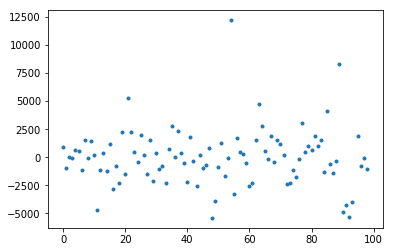

In [17]:
print(model['ols_subset'].resid.mean())
plt.plot(model['ols_subset'].resid, marker='.', linestyle='None')
plt.show()

Mean of residuals is almost 0.

### Assumption: Residuals are normally distributed.

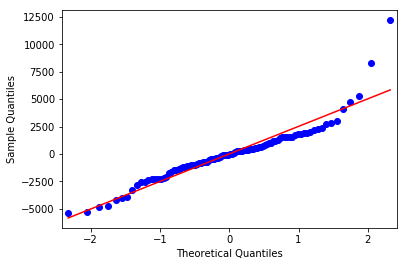

In [20]:
sgg.qqplot(model['ols_subset'].resid, line='s')
plt.show()

Almost normally distributed.

### Assumption: Residuals are not correlated

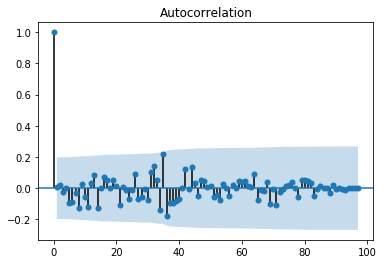

In [21]:
sgt.plot_acf(model['ols_subset'].resid)
plt.show()

No autocorrelation detected in residuals.

### Assumption: Residuals are homoscedastic

In [22]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = smsa.het_breuschpagan(model['ols_subset'].resid, model['ols_subset'].model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 32.697154355367367),
 ('p-value', 0.008103561135937078),
 ('f-value', 2.534795264892908),
 ('f p-value', 0.0033105155180460917)]

Heteroskedasticity is detected.

### Assumption: Predictors are not correlated

In [23]:
np.linalg.cond(model['ols_subset'].model.exog)

1415.8051212249195

Model suffers from severe multicollinearity.

### Predicting old_price instead of current_price

The rationale behind predicting **current_price** may be questionable, because the **old_price**, which is not (or less) discounted, may better represent the "true price" of the TV based on its brand, dimension and technologies.  

We now fit a similar linear model using the same features, but predicting **old_price** instead of **current_price**.  

As observed earlier, there are NaNs in the **old_price** column (3 of them). For simplicity, we will ommit those rows from the following model.

In [24]:
model['ols_predict_old'] = smf.ols('old_price ~ inch + C(UHD) + C(X4K) + C(LED) + C(QLED) + C(OLED) + brand', 
                              data = data['regression'], missing='drop').fit()
model['ols_predict_old'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              old_price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     20.93
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           4.13e-21
Time:                        21:32:49   Log-Likelihood:                -894.30
No. Observations:                  95   AIC:                             1819.
Df Residuals:                      80   BIC:                             1857.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.084e+04   2880.794     -3.762      0.000   -1.66e+04   -5105.532
C(UHD)[T.1]  -2829.2463   1260.161     -2.245      0.028   -5337.047    -321.446
C(X4K)[T.1]   -280.0926   1316.953     -0.213      0.832   -2900.913    2340.728
C(LED)[T.1]  -1046.8316   1177.112     -0.889      0.376   -3389.359    1295.696
C(QLED)[T.1]  6332.6355   1953.959      3.241      0.002    2444.134    1.02e+04
C(OLED)[T.1]  7447.8446   1326.544      5.614      0.000    4807.938    1.01e+04
brand[T.HSE] -4477.9909   2933.791     -1.526      0.131   -1.03e+04    1360.439
brand[T.LG]   -679.3893   2948.077     -0.230      0.818   -6546.249    5187.470
brand[T.MSI]   1.51e-12   2.72e-12      0.554      0.581   -3.91e-12    6.93e-12
brand[T.PEN]  7.628e-13    1.3e-12      0.586      0.560   -1.83e-12    3.36e-12
brand[T.PLP] -1992.6408   2892.154     -0.689      0.493   -7748.211    3762.929
brand[T.PSN] -1434.2397   2641.496     -0.543      0.589   -6690.984    3822.505
brand[T.SAM] -2218.5662   2685.534     -0.826      0.411   -7562.949    3125.816
brand[T.SHP] -2344.1498   2652.349     -0.884      0.379   -7622.493    2934.193
brand[T.SNY] -3398.7073   2522.131     -1.348      0.182   -8417.908    1620.493
brand[T.TSB] -1260.3124   2942.760     -0.428      0.670   -7116.591    4595.966
inch           373.1462     38.934      9.584      0.000     295.666     450.626
==============================================================================
Omnibus:                       30.397   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.274
Skew:                           1.031   Prob(JB):                     1.51e-20
Kurtosis:                       7.337   Cond. No.                     8.19e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.52e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- The results seem to conform with the hypothesis that **old_price** is a better reflection of the "true price" of a TV. 
- We notice that the model has a fairly high R-squared (78.6%)

### Conclusion

By running a simple linear regression analysis, we have determined a fairly useful linear model for understanding the relationship between the *price* of TVs and other factors (*inch*, *brand* & technology used). The model achieved a an R-squared that is higher than 75%.   

However, more analysis are required to determine a better model because the current model suffers from the following issues:  
- strong multicollinearity 
- heteroskedasticity in residuals